# FFT

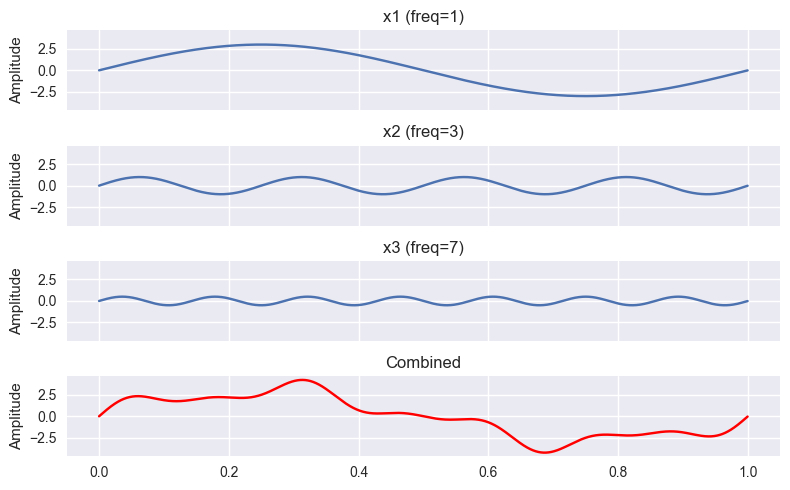

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8")

sampling_rate = 2000
ts = 1.0 / sampling_rate
t = np.arange(0, 1, ts)

freq = 1.
x1 = 3 * np.sin(2 * np.pi * freq * t)

freq = 4
x2 = np.sin(2 * np.pi * freq * t)

freq = 7
x3 = 0.5 * np.sin(2 * np.pi * freq * t)

x = x1 + x2 + x3

fig, axs = plt.subplots(4, 1, figsize=(8, 5), sharex=True, sharey=True)

axs[0].plot(t, x1)
axs[0].set_ylabel('Amplitude')
axs[0].set_title("x1 (freq=1)")

axs[1].plot(t, x2)
axs[1].set_ylabel('Amplitude')
axs[1].set_title("x2 (freq=3)")

axs[2].plot(t, x3)
axs[2].set_ylabel('Amplitude')
axs[2].set_title("x3 (freq=7)")

axs[3].plot(t, x, 'r')
axs[3].set_ylabel('Amplitude')
axs[3].set_title("Combined")

plt.tight_layout()
plt.show()

/Users/kotarohara/miniforge3/envs/cs702-2024/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/kotarohara/miniforge3/envs/cs702-2024/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


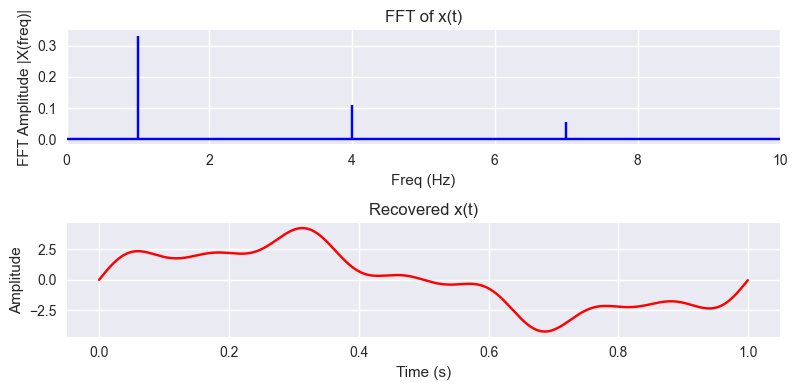

In [9]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N / sampling_rate
freq = n / T

fig, axs = plt.subplots(2, 1, figsize=(8, 4))

axs[0].stem(freq, np.abs(X) / np.sum(np.abs(X)), 'b', markerfmt=" ", basefmt="-b")
axs[0].set_title('FFT of x(t)')
axs[0].set_xlabel('Freq (Hz)')
axs[0].set_ylabel('FFT Amplitude |X(freq)|')
axs[0].set_xlim(0, 10)

recovered_x = ifft(X)
axs[1].plot(t, recovered_x, 'r')
axs[1].set_title('Recovered x(t)')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()

# Band-pass filter (Low pass filter)

In [31]:
import IPython

wav_file = 'sound.wav'
IPython.display.Audio(wav_file)

In [32]:
import wave
import numpy as np
import matplotlib.pyplot as plt

wav_file = 'sound.wav'

with wave.open(wav_file) as wav:
    sampling_frequency = wav.getframerate()  # Hz
    sample_size = wav.getsampwidth()  # Byte
    num_channels = wav.getnchannels()
    num_samples = wav.getnframes()
    waveform = wav.readframes(num_samples)
    waveform = np.frombuffer(waveform, dtype=np.int16)

print(f"Sampling Frequency: {sampling_frequency} [Hz]")
print(f"Sample Size: {sample_size} [Byte]")
print(f"Number of Channels: {num_channels}")
print(f"Number of Samples: {num_samples}")

# Sampling Frequency: 48000 [Hz]
# Sample Size: 2 [Byte]
# Number of Channels: 2
# Number of Samples: 159744

Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 2
Number of Samples: 159744


In [33]:
# Extract the first channel
ch0 = waveform[0::2]

# Down sample from 48000 to 16000.
sampling_frequency = sampling_frequency / 3
num_samples = round(num_samples / 3)
ch0 = ch0[::3]

time_axis = np.arange(num_samples) / sampling_frequency

# Apply DFT to the audio data
fft_data = np.fft.fft(waveform)
freqs = np.fft.fftfreq(len(fft_data), 1 / sampling_frequency)

In [34]:
# Apply a low-pass filter by setting high-frequency components (say, above 20kHz) to zero
cutoff_freq = 2000
filtered_fft_data = fft_data.copy()
filtered_fft_data[np.abs(freqs) > cutoff_freq] = 0

# Reconstruct the filtered signal using IDFT and set the peak value to the original signal
filtered_audio_data = np.fft.ifft(filtered_fft_data, n=num_samples)

# Normalize the filtered audio data to prevent clipping
bit_depth = 16
max_int_value = 2 ** (bit_depth - 1) - 1
filtered_audio_data = np.int16((filtered_audio_data / np.max(np.abs(filtered_audio_data))) * max_int_value)

# Save the filtered audio to a new wave file
filtered_waveform = np.int16(filtered_audio_data.real)
with wave.open('filtered_sound.wav', 'w') as wav:
    wav.setnchannels(1)
    wav.setsampwidth(2)
    wav.setframerate(sampling_frequency)
    wav.writeframes(filtered_waveform)

filtered_time_axis = np.arange(num_samples) / sampling_frequency

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70479/1313604503.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_audio_data = np.int16((filtered_audio_data/np.max(np.abs(filtered_audio_data))) * max_int_value)


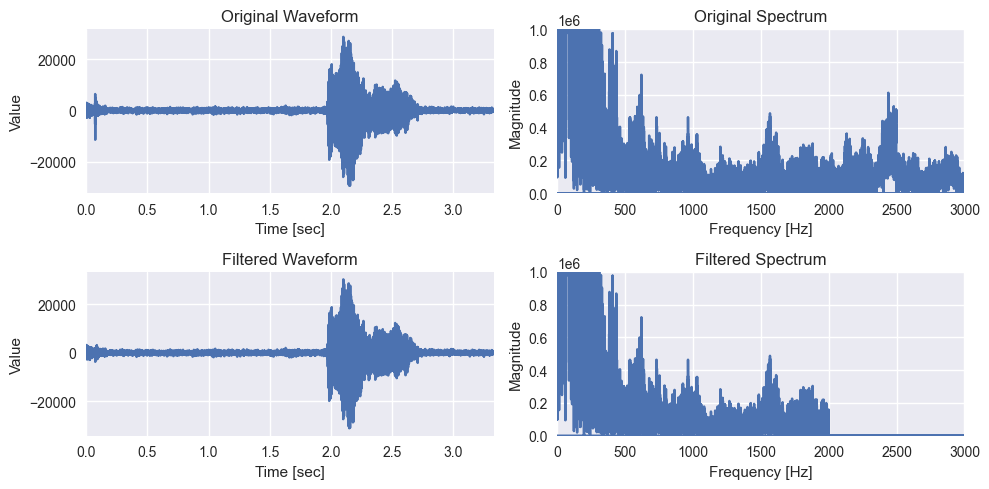

In [35]:
# Plot the original wave form, its spectrum, the filtered wave form, and its spectrum

fig, axs = plt.subplots(2, 2, figsize=(10, 5))

axs[0, 0].plot(time_axis, ch0)
axs[0, 0].set_title('Original Waveform')
axs[0, 0].set_xlabel('Time [sec]')
axs[0, 0].set_ylabel('Value')
axs[0, 0].set_xlim([0, num_samples / sampling_frequency])

axs[0, 1].plot(freqs, np.abs(fft_data))
axs[0, 1].set_title('Original Spectrum')
axs[0, 1].set_xlabel('Frequency [Hz]')
axs[0, 1].set_ylabel('Magnitude')
axs[0, 1].set_xlim([0, 3000])
axs[0, 1].set_ylim([0, 1e6])

axs[1, 0].plot(filtered_time_axis, filtered_waveform)
axs[1, 0].set_title('Filtered Waveform')
axs[1, 0].set_xlabel('Time [sec]')
axs[1, 0].set_ylabel('Value')
axs[1, 0].set_xlim([0, num_samples / sampling_frequency])

axs[1, 1].plot(freqs, np.abs(filtered_fft_data))
axs[1, 1].set_title('Filtered Spectrum')
axs[1, 1].set_xlabel('Frequency [Hz]')
axs[1, 1].set_ylabel('Magnitude')
axs[1, 1].set_xlim([0, 3000])
axs[1, 1].set_ylim([0, 1e6])

plt.tight_layout()
plt.show()


In [36]:
wav_file = 'filtered_sound.wav'
IPython.display.Audio(wav_file)

## Spectral Decomposition with FFT

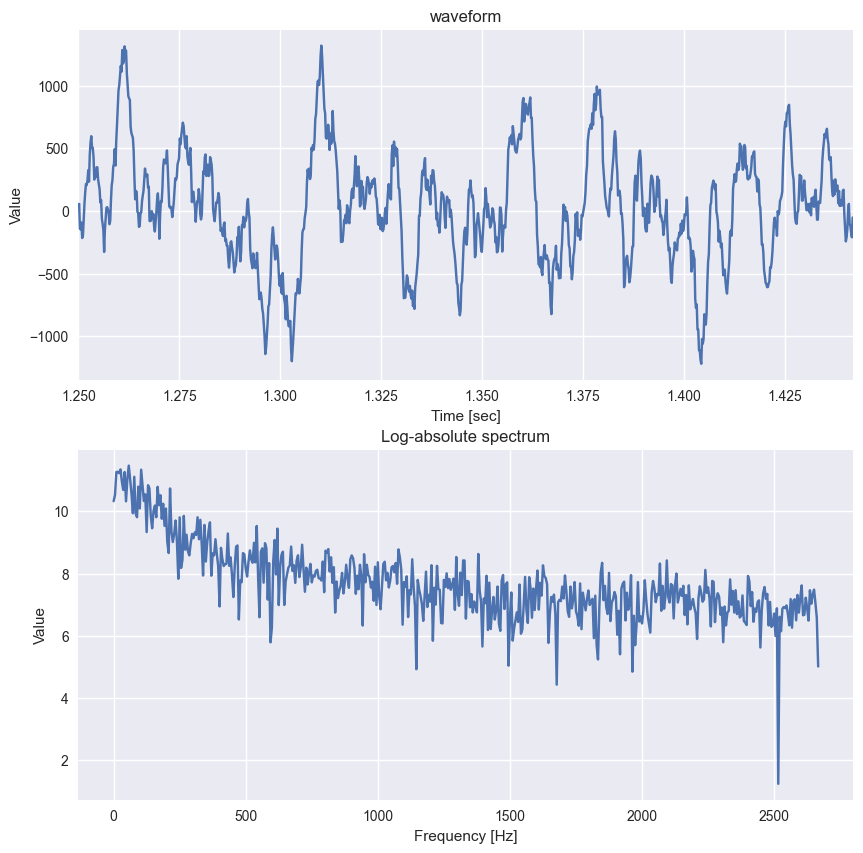

In [25]:
# Extract the first channel
ch0 = waveform[0::2]

# Down sample from 48000 to 16000.
sampling_frequency = sampling_frequency / 3
num_samples = round(num_samples / 3)
ch0 = ch0[::3]

target_time = 1.25
fft_size = 1024
target_index = np.int16(target_time * sampling_frequency)
frame = ch0[target_index:target_index + fft_size]
spectrum = np.fft.fft(frame)
absolute = np.abs(spectrum)
absolute = absolute[:np.int16(fft_size / 2) + 1]
log_spectrum = np.log(absolute + 1e-7)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
time_axis = target_time + np.arange(fft_size) / sampling_frequency

plt.plot(time_axis, frame)

plt.title('waveform')
plt.xlabel('Time [sec]')
plt.ylabel('Value')

plt.xlim([target_time, target_time + fft_size / sampling_frequency])

plt.subplot(2, 1, 2)
freq_axis = np.arange(np.int16(fft_size / 2) + 1) * sampling_frequency / fft_size
plt.plot(freq_axis, log_spectrum)
plt.title('Log-absolute spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Value')
plt.show()

# Mel filter bank

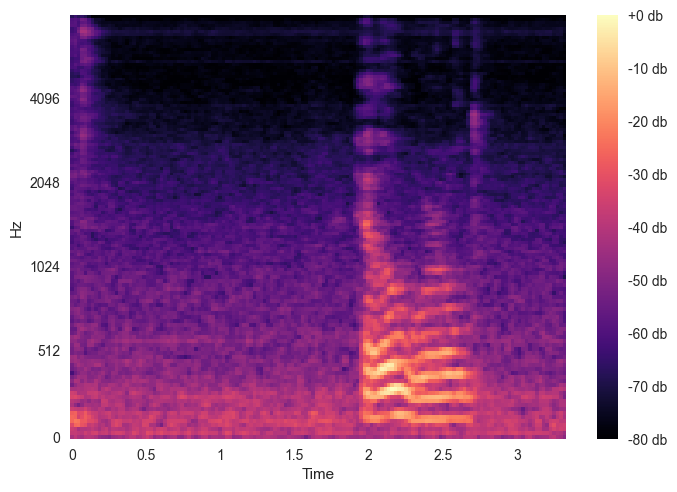

# Short-time Fourier Transform

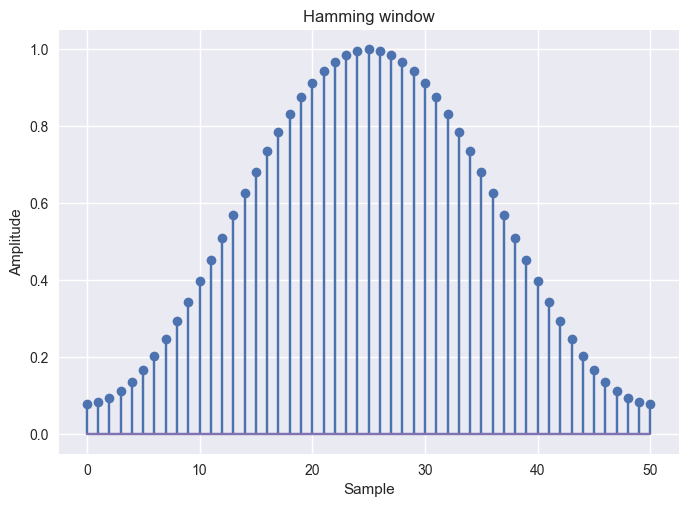

In [37]:
# Window function
from scipy import signal

window = signal.windows.hamming(51)

plt.stem(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.show()

In [48]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

sampling_frequency = 16000
y, s = librosa.load('sound.wav', sr=sampling_frequency)
y = (y * 32767).astype(np.int16)

duration = len(y) / sampling_frequency
time_axis = np.arange(len(y)) / sampling_frequency
print(f"Duration: {duration} [s]")

Duration: 3.328 [s]


In [49]:
# Plot a spectrogram
num_samples = len(y)
frame_duration = 25  # [ms]
frame_shift_duration = 10  # [ms]

frame_size = int(sampling_frequency * frame_duration / 1000)
frame_shift = int(sampling_frequency * frame_shift_duration / 1000)

fft_size = 512
num_frames = (num_samples)

num_frames = (num_samples - frame_size) // frame_shift + 1
print(f"Number of frames: {num_frames}")

Number of frames: 331


In [50]:
spectrogram = np.zeros((num_frames, int(fft_size / 2) + 1))

for frame_idx in range(num_frames):
    start_index = frame_idx * frame_shift
    frame = y[start_index:start_index + frame_size].copy()
    frame = frame * signal.windows.hamming(frame_size)
    spectrum = fft(frame, n=fft_size)
    absolute = np.abs(spectrum)
    absolute = absolute[:int(fft_size / 2) + 1]
    log_absolute = np.log(absolute + 1e-7)
    spectrogram[frame_idx, :] = log_absolute

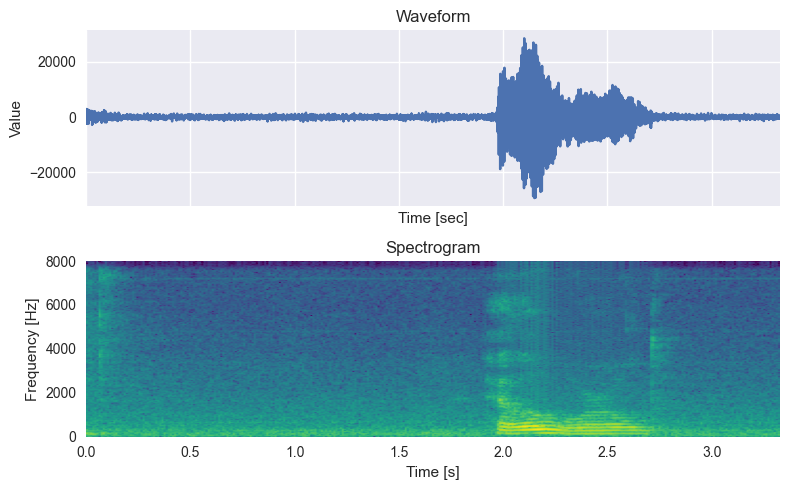

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

axs[0].plot(time_axis, y)
axs[0].set_title("Waveform")
axs[0].set_xlabel("Time [sec]")
axs[0].set_ylabel("Value")

spectrogram -= np.max(spectrogram)
vmax = np.abs(np.min(spectrogram)) * 0.0
vmin = -np.abs(np.min(spectrogram)) * 0.7

axs[1].imshow(spectrogram.T[-1::-1, :],
              extent=[0, num_samples / sampling_frequency, 0, sampling_frequency / 2],
              vmax=vmax, vmin=vmin, aspect='auto', cmap='viridis')
axs[1].set_title("Spectrogram")
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Frequency [Hz]")
# No grid
axs[1].grid(False)

plt.tight_layout()
plt.show()

# Filter Bank

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70479/136258918.py:1: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  tri = signal.triang(33)


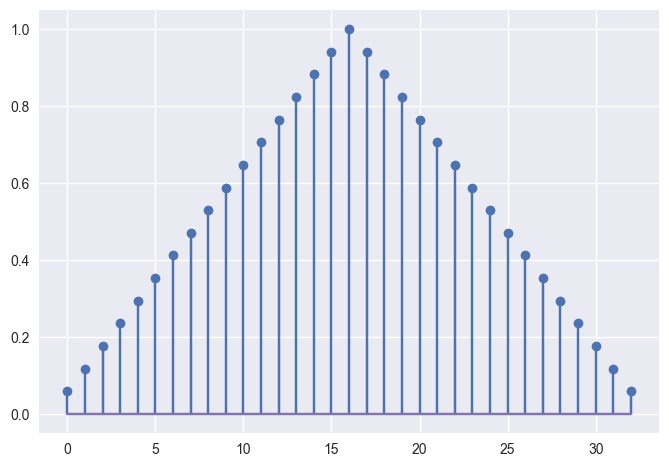

In [56]:
tri = signal.triang(33)
# tri = tri / np.sum(tri)
plt.stem(tri)
plt.show()

In [57]:
feature = np.zeros(log_absolute.shape[0])
np.shape(feature)

(257,)

In [58]:
# Create filter banks
dim_spectrum = 257
num_banks = 7
step_size = 32
bank_size = 64

filter_banks = []
for k in range(num_banks):
    bank = np.zeros(dim_spectrum)
    tri = signal.triang(bank_size)

    f_low = k * step_size
    f_high = f_low + bank_size

    bank[f_low:f_high] = tri

    filter_banks.append(bank)

/var/folders/4_/vrr8kzqn5b9dxsprxn13022m0000gn/T/ipykernel_70479/1748061738.py:10: DeprecationWarning: Importing triang from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.triang' or the convenience function 'scipy.signal.get_window' instead.
  tri = signal.triang(bank_size)


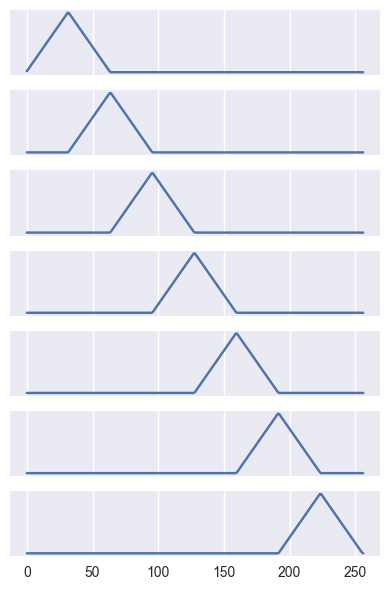

In [71]:
fig, axs = plt.subplots(7, 1, figsize=(4, 6), sharex=True)

for k, bank in enumerate(filter_banks):
    axs[k].plot(bank)
    axs[k].set_yticks([])
plt.tight_layout()
plt.show()

In [60]:
features = []
for bank in filter_banks:
    feature = log_absolute * bank
    features.append(feature)

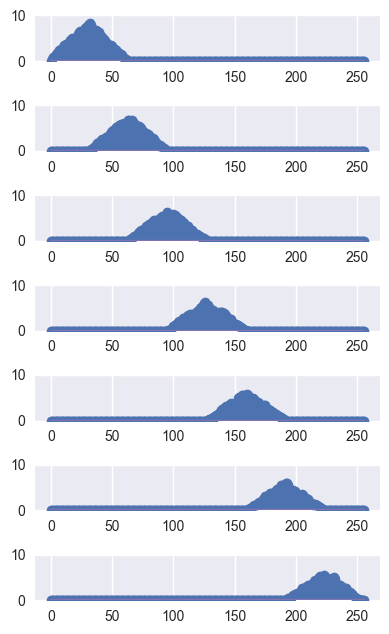

In [61]:
plt.figure(figsize=(4, 8))
for k, bank in enumerate(features, 1):
    plt.subplot(9, 1, k)
    plt.stem(bank)
    plt.ylim([0, 10])
plt.tight_layout()
plt.show()

# Mel Filter Bank

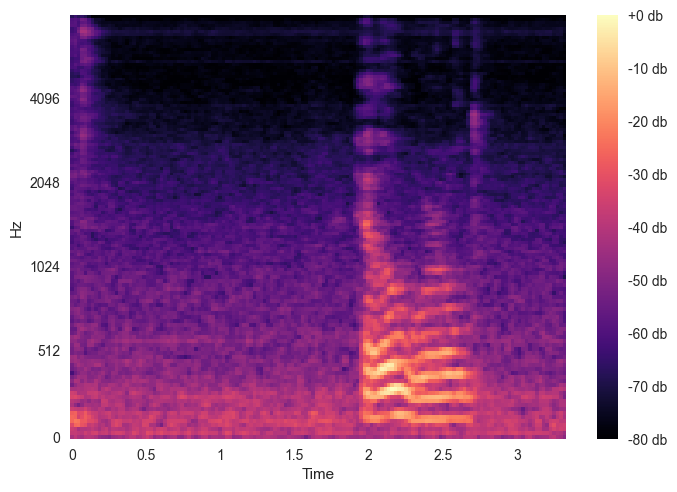

In [47]:
import librosa.display

import matplotlib.pyplot as plt
import numpy as np

y, sr = librosa.load("sound.wav")
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

fig, ax = plt.subplots()
S_db = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_db, x_axis="time", y_axis="mel", sr=sr, fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format="%+2.0f db")
plt.show()

# Dynamic Time Warping

In [74]:
from enum import Enum, IntEnum


class Track(IntEnum):
    TOP = 0
    DIAGONAL = 1
    LEFT = 2


s1 = np.array([1, 4, 9])
s2 = np.array([0, 0, 1, 0, 4, 0, 9])

In [76]:
# Prepare a distance matrix
s1_tiled = np.tile(s1, len(s2)).reshape(len(s2), len(s1)).T
s2_tiled = np.tile(s2, len(s1)).reshape(len(s1), len(s2))
dist_mat = np.sqrt((s1_tiled - s2_tiled) ** 2)

n_rows, n_cols = dist_mat.shape

In [77]:
cost_mat = np.zeros(dist_mat.shape)
track_mat = np.zeros(dist_mat.shape)

In [78]:
# Calculate the costs for the first row and first column
cost_mat[0, 0] = dist_mat[0, 0]
track_mat[0, 0] = Track.TOP

for col in range(1, n_cols):
    cost_mat[0, col] = cost_mat[0, col - 1] + dist_mat[0, col]
    track_mat[0, col] = Track.LEFT

for row in range(1, n_rows):
    cost_mat[row, 0] = cost_mat[row - 1, 0] + dist_mat[row, 0]
    track_mat[row, 0] = Track.TOP

In [79]:
# Calculate the cost for the remaining cells
for row in range(1, n_rows):
    for col in range(1, n_cols):
        cost_top = cost_mat[row - 1, col] + dist_mat[row, col]
        cost_diagonal = cost_mat[row - 1, col - 1] + dist_mat[row, col]
        cost_left = cost_mat[row, col - 1] + dist_mat[row, col]

        costs = [cost_top, cost_diagonal, cost_left]
        cost_mat[row, col] = np.min(costs)

        if np.argmin(costs) == Track.TOP:
            track_mat[row, col] = Track.TOP
        elif np.argmin(costs) == Track.LEFT:
            track_mat[row, col] = Track.LEFT
        else:
            track_mat[row, col] = Track.DIAGONAL

In [81]:
# Calculate the shortest path by backtracking
col = n_cols - 1
row = n_rows - 1

alignment = []
alignment.append((row, col))

while col > 0 or row > 0:
    if track_mat[row, col] == Track.TOP:
        row -= 1
    elif track_mat[row, col] == Track.LEFT:
        col -= 1
    else:
        row -= 1
        col -= 1
    alignment.append((row, col))

In [82]:
alignment = np.array(alignment)[::-1]
print(alignment)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 4]
 [1 5]
 [2 6]]


In [83]:
dtw_dist = cost_mat[-1, -1] / np.sum(cost_mat.shape)
print(f"DTW distance: {dtw_dist}")

DTW distance: 0.7
